Сканируем: http://quotes.toscrape.com/page/1/
Сканируем: http://quotes.toscrape.com/page/2/
Сканируем: http://quotes.toscrape.com/page/3/
Сканируем: http://quotes.toscrape.com/page/4/
Сканируем: http://quotes.toscrape.com/page/5/
Пример данных:


,text,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,"[change, deep-thoughts, thinking, world]"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"[abilities, choices]"
2,“There are only two ways to live your life. On...,Albert Einstein,"[inspirational, life, live, miracle, miracles]"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"[aliteracy, books, classic, humor]"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"[be-yourself, inspirational]"



Уникальных авторов: 28

Топ-5 авторов по количеству цитат:
author
Albert Einstein    8
J.K. Rowling       6
Marilyn Monroe     6
Dr. Seuss          3
Bob Marley         3
Name: count, dtype: int64

Топ-5 популярных тегов:
inspirational: 9
love: 9
life: 8
humor: 5
books: 4


/tmp/ipython-input-3-3224430396.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


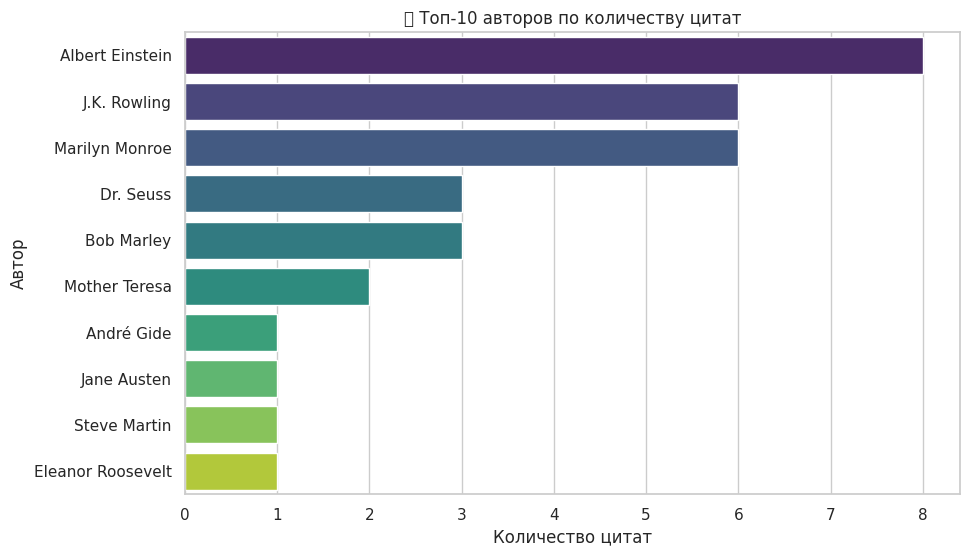

/tmp/ipython-input-3-3224430396.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_df, x="count", y="tag", palette="magma")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


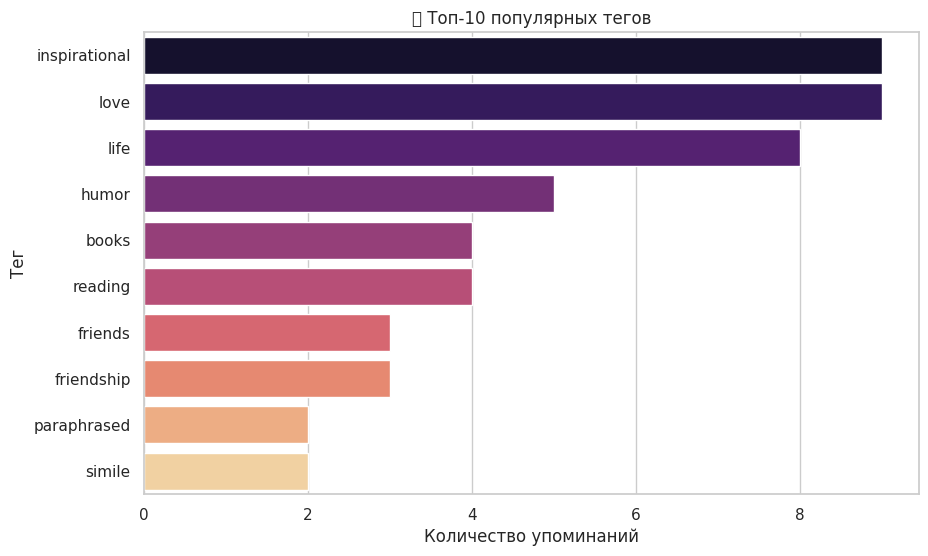

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


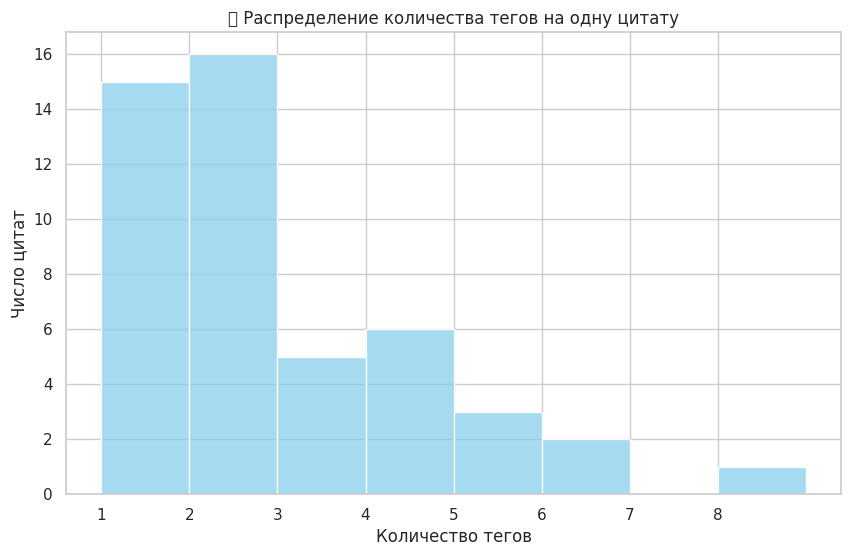

In [3]:
# Установка нужных библиотек
!pip install requests beautifulsoup4 pandas matplotlib seaborn

# Импорт модулей
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Настройки для графиков
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# --- Модуль spider для сбора данных ---
class QuoteSpider:
    def __init__(self, base_url):
        self.base_url = base_url
        self.quotes = []

    def fetch_page(self, url):
        try:
            response = requests.get(url)
            response.raise_for_status()
            return response.text
        except requests.RequestException as e:
            print(f"Ошибка при загрузке страницы: {e}")
            return None

    def parse_quotes(self, html):
        soup = BeautifulSoup(html, 'html.parser')
        quote_blocks = soup.find_all('div', class_='quote')
        for block in quote_blocks:
            text = block.find('span', class_='text').get_text(strip=True)
            author = block.find('small', class_='author').get_text(strip=True)
            tags = [tag.get_text() for tag in block.find_all('a', class_='tag')]
            self.quotes.append({'text': text, 'author': author, 'tags': tags})

    def crawl(self, max_pages=5):
        for page in range(1, max_pages + 1):
            url = f"{self.base_url}/page/{page}/"
            print(f"Сканируем: {url}")
            html = self.fetch_page(url)
            if html:
                self.parse_quotes(html)
            else:
                break
        return pd.DataFrame(self.quotes)

# --- Сбор данных и формирование датасета ---
spider = QuoteSpider("http://quotes.toscrape.com")
df = spider.crawl(max_pages=5)

# Сохраняем в CSV
df.to_csv("quotes_dataset.csv", index=False)

# Вывод первых строк
print("Пример данных:")
display(df.head())

# --- Анализ данных ---
print("\nУникальных авторов:", df['author'].nunique())
print("\nТоп-5 авторов по количеству цитат:")
print(df['author'].value_counts().head(5))

# Подсчет всех тегов
all_tags = sum(df['tags'], [])
tag_counts = Counter(all_tags)
print("\nТоп-5 популярных тегов:")
for tag, count in tag_counts.most_common(5):
    print(f"{tag}: {count}")

# --- Визуализации ---

# 📈 Топ-10 авторов
top_authors = df['author'].value_counts().head(10)
plt.figure()
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title("🔝 Топ-10 авторов по количеству цитат")
plt.xlabel("Количество цитат")
plt.ylabel("Автор")
plt.show()

# 🏷️ Топ-10 тегов
top_tags = tag_counts.most_common(10)
tag_df = pd.DataFrame(top_tags, columns=["tag", "count"])
plt.figure()
sns.barplot(data=tag_df, x="count", y="tag", palette="magma")
plt.title("🏷️ Топ-10 популярных тегов")
plt.xlabel("Количество упоминаний")
plt.ylabel("Тег")
plt.show()

# 📊 Распределение количества тегов на цитату
df["num_tags"] = df["tags"].apply(len)
plt.figure()
sns.histplot(df["num_tags"], bins=range(1, df["num_tags"].max() + 2), kde=False, color="skyblue")
plt.title("📊 Распределение количества тегов на одну цитату")
plt.xlabel("Количество тегов")
plt.ylabel("Число цитат")
plt.xticks(range(1, df["num_tags"].max() + 1))
plt.show()
